In [2]:
import numpy as np
import random
import os, subprocess
import matplotlib.pyplot as plt


# (Part a ~ b) Perceptron Learning Algorithm

In [3]:
class Perceptron:
    def __init__(self, N):
        # Random linearly separated data
        xA,yA,xB,yB = [random.uniform(-1, 1) for i in range(4)]
        self.V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
        self.X = self.generate_points(N)
 
    def generate_points(self, N):
        X = []
        for i in range(N):
            x1,x2 = [random.uniform(-1, 1) for i in range(2)]
            x = np.array([1,x1,x2])
            s = int(np.sign(self.V.T.dot(x)))
            X.append((x, s))
        return X
 
    def plot(self, mispts=None, vec=None, save=False):
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        V = self.V
        a, b = -V[1]/V[2], -V[0]/V[2]
        l = np.linspace(-1,1)
        plt.plot(l, a*l+b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x,s in self.X:
            plt.plot(x[1], x[2], cols[s]+'o')
        if mispts:
            for x,s in mispts:
                plt.plot(x[1], x[2], cols[s]+'.')
        if vec != None:
            aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
            plt.plot(l, aa*l+bb, 'g-', lw=2)
        if save:
            if not mispts:
                plt.title('N = %s' % (str(len(self.X))))
            else:
                plt.title('N = %s with %s test points' \
                          % (str(len(self.X)),str(len(mispts))))
            plt.savefig('p_N%s' % (str(len(self.X))), \
                        dpi=200, bbox_inches='tight')
 
    def classification_error(self, vec, pts=None):
        # Error defined as fraction of misclassified points
        if not pts:
            pts = self.X
        M = len(pts)
        n_mispts = 0
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                n_mispts += 1
        error = n_mispts / float(M)
        return error
 
    def choose_miscl_point(self, vec):
        # Choose a random point among the misclassified
        pts = self.X
        mispts = []
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x, s))
        return mispts[random.randrange(0,len(mispts))]
 
    def pla(self, save=False):
        # Initialize the weigths to zeros
        w = np.zeros(3)
        X, N = self.X, len(self.X)
        it = 0
        # Iterate until all points are correctly classified
        while self.classification_error(w) != 0:
            it += 1
            # Pick random misclassified point
            x, s = self.choose_miscl_point(w)
            # Update weights
            w += s*x
            if save:
                self.plot(vec=w)
                plt.title('N = %s, Iteration %s\n' \
                          % (str(N),str(it)))
                plt.savefig('p_N%s_it%s' % (str(N),str(it)), \
                            dpi=200, bbox_inches='tight')
        self.w = w
 
    def check_error(self, M, vec):
        check_pts = self.generate_points(M)
        return self.classification_error(vec, pts=check_pts)

# (Part c): Randomly  generated  data  set  of  size  20.

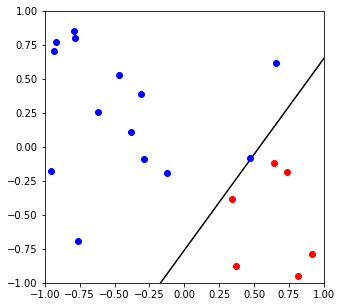

In [4]:
p = Perceptron(20)
p.plot()

# (Part d): Randomly  generated  data  set  of  size  100

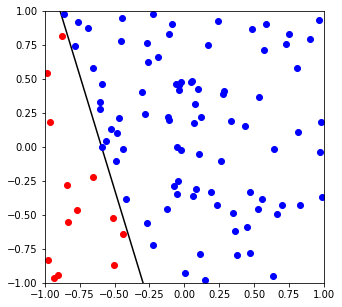

In [5]:
p = Perceptron(100)
p.plot()

# (Part e): Randomly  generated  data  set  of  size  1000

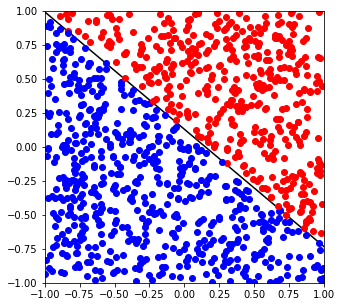

In [6]:
p = Perceptron(1000)
p.plot()

# (Part F): Randomly generatea  linearly  separable  data  set  of  size  1,000  with $x_n$ ∈$R^{10}$ and  feed  the  data  set  to  the algorithm.  

In [14]:
class Perceptron1:
    def __init__(self, N):
        # Random linearly separated data
        xA,yA,xB,yB = [random.uniform(-1, 1) for i in range(4)]
        self.V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
        self.X = self.generate_points(N)
 
    def generate_points(self, N):
        X = []
        for i in range(N):
            x1,x2,x3,x4,x5,x6,x7,x8,x9,x10 = [random.uniform(-1, 1) for i in range(10)]
            x = np.array([1,x1,x2])
            s = int(np.sign(self.V.T.dot(x)))
            X.append((x, s))
        return X
 
    def plot(self, mispts=None, vec=None, save=False):
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        V = self.V
        a, b = -V[1]/V[2], -V[0]/V[2]
        l = np.linspace(-1,1)
        plt.plot(l, a*l+b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x,s in self.X:
            plt.plot(x[1], x[2], cols[s]+'o')
        if mispts:
            for x,s in mispts:
                plt.plot(x[1], x[2], cols[s]+'.')
        if vec != None:
            aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
            plt.plot(l, aa*l+bb, 'g-', lw=2)
        if save:
            if not mispts:
                plt.title('N = %s' % (str(len(self.X))))
            else:
                plt.title('N = %s with %s test points' \
                          % (str(len(self.X)),str(len(mispts))))
            plt.savefig('p_N%s' % (str(len(self.X))), \
                        dpi=200, bbox_inches='tight')
 
    def classification_error(self, vec, pts=None):
        # Error defined as fraction of misclassified points
        if not pts:
            pts = self.X
        M = len(pts)
        n_mispts = 0
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                n_mispts += 1
        error = n_mispts / float(M)
        return error
 
    def choose_miscl_point(self, vec):
        # Choose a random point among the misclassified
        pts = self.X
        mispts = []
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x, s))
        return mispts[random.randrange(0,len(mispts))]
 
    def pla(self, save=False):
        # Initialize the weigths to zeros
        w = np.zeros(3)
        X, N = self.X, len(self.X)
        it = 0
        # Iterate until all points are correctly classified
        while self.classification_error(w) != 0:
            it += 1
            # Pick random misclassified point
            x, s = self.choose_miscl_point(w)
            # Update weights
            w += s*x
            if save:
                self.plot(vec=w)
                plt.title('N = %s, Iteration %s\n' \
                          % (str(N),str(it)))
                plt.savefig('p_N%s_it%s' % (str(N),str(it)), \
                            dpi=200, bbox_inches='tight')
        self.w = w
 
    def check_error(self, M, vec):
        check_pts = self.generate_points(M)
        return self.classification_error(vec, pts=check_pts)

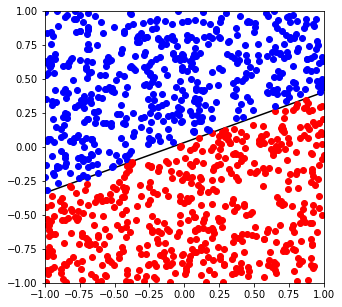

In [13]:
p = Perceptron1(1000)
p.plot()